#  Проект "Анализ результатов А/В теста"

Цель проекта - увеличение выручки крупного интернет-магазина. 

# Задачи проекта:

Требуется приоритизировать подготовленные аналитиком и сотрудинками отдела маркетинга гипотезы, запустить А/В-тест и проанализировать результаты.

In [37]:
# импортируем нужные библиотаки

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

## Приоритизация гипотез

In [38]:
# загружаем изучаемые данные с гипотезами
try:
    data = pd.read_csv('hypothesis.csv')
except:
    data = pd.read_csv('/datasets/hypothesis.csv')

In [39]:
# выводим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [40]:
# Снимаем ограничение на количество выводимых символов в таблице (чтобы полностью видеть гипотезу)
pd.set_option('display.max_colwidth', None)

In [41]:
# Выводим таблицу на экран
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE

In [42]:
# Применяем фреймворк ICE для приоритизации гипотез, сортируем их по убыванию приоритета
data['ICE'] = np.round_(data['Impact']*data['Confidence']/data['Efforts'], decimals = 2)
display(data[['Hypothesis', 'ICE']].sort_values(by='ICE',ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Фреймворк RICE

In [43]:
# Применяем фреймворк RICE для приоритизации гипотез, сортируем их по убыванию приоритета
data['RICE'] = data['Reach']*data['Impact']*data['Confidence']/data['Efforts']
display(data[['Hypothesis', 'RICE']].sort_values(by='RICE',ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Главное отличие RICE от ICE - в том, что в первом мы учитываем еще и уровень охвата - на какое количество людей каждая фича или проект повлияет в течение определенного периода времени, и сколько пользователей увидят такие изменения.

Если при применении ICE лидирует гипотеза со скидкой в день рождения, далее следует гипотеза с добавлением двух новых каналов привлечения трафика и замыкает круг лидеров добавление формы подписки на все основные страницы (для сбора базы клиентов для email-рассылок), то при применении фрейм-ворка RICE эта гипотеза поднимается на первую позицию и лидирует со значительным отрывом. Здесь объяснение простое - параметр "reach" самый высокий. Так же объясняются и другие перестановки в итоговой таблице - чем выше уровень охвата, тем более высокую позицию занимает та или иная гипотеза.

## Анализ A/B-теста

### Предобработка данных

In [44]:
# Загружаем результаты A/B-теста

try:
    orders, visitors = (
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
)
except:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
)    

In [45]:
# Выводим общую информацию о заказах и посетителях

display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [46]:
# Выводим первые 5 строк из каждой таблицы

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [47]:
# Приведем даты к нужному формату

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [48]:
# Считаем сколько уникальных пользователей в каждой группе

display(orders.groupby('group').agg({'visitorId' : 'nunique'}))

# Так же посмотрим как распределены заказы между пользователями в каждой из групп
display(orders.groupby('group').agg({'visitorId' : 'count'}))

,visitorId
group,
A,503
B,586


,visitorId
group,
A,557
B,640


In [49]:
# считаем относительную разницу между уникальными пользователями в группах
format(
    orders['visitorId'][orders['group'] == 'B'].nunique() /
    orders['visitorId'][orders['group'] == 'A'].nunique() - 1
    , '.0%')


'17%'

Группа В на 17% больше по количеству уникальных пользователей, чем группа А. Разница существенная, можно сделать вывод о несбалансированности групп тестирования.

In [50]:
# Проверим, есть ли пользователи, состоящие у обеих группах

orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [51]:
# Проверям, совпадают ли даты начала и окончания теста в файлах с заказами и визитами
display(orders['date'].min() == visitors['date'].min())
display(orders['date'].max() == visitors['date'].max())

True

True

In [52]:
# Выводим даты начала и окончания теста
display(
    'Дата начала проведения теста:', orders['date'].min().strftime('%Y-%m-%d'),
    'Дата окончания проведения теста:', orders['date'].max().strftime('%Y-%m-%d')
)

'Дата начала проведения теста:'

'2019-08-01'

'Дата окончания проведения теста:'

'2019-08-31'

Мы изменили тип данных, где это требовалось для удобства дальнейшего анализа. 

Установили даты начала и окончания проведения теста - с 1 по 31 августа 2019 г.

Также были обнаружены пользователи, состоящие в обеих группах тестирования. Так как 58 пользователей это достоточно много для наших данных, принимаем решение не удалять их.

### Строим график кумулятивной выручки по группам

In [53]:
# Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                        orders['group'] == x['group'])].agg(
            {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}
        ), 
        axis=1).sort_values(by=['date','group'])
)

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(
        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                          visitors['group'] == x['group'])].agg(
            {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}
        ),
        axis=1).sort_values(by=['date','group'])
)

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


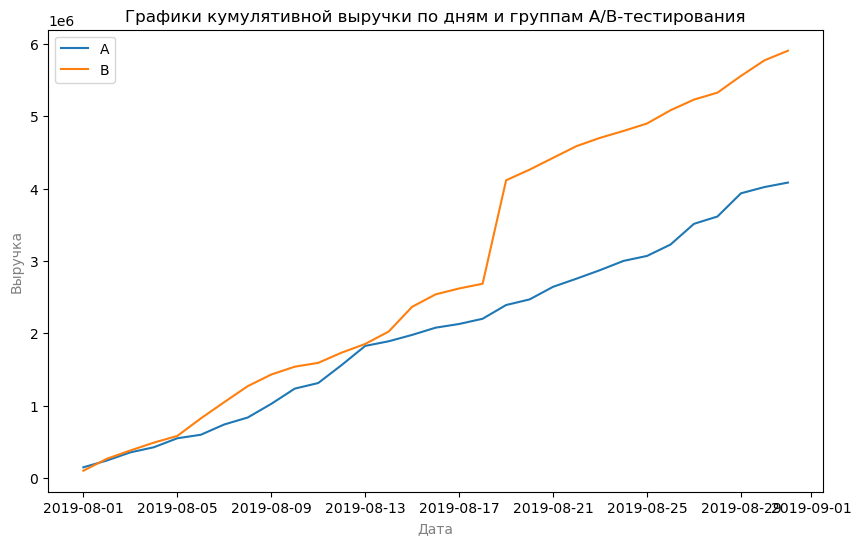

In [54]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Задаем размеры графика
plt.figure(figsize=(10,6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Выводим название графика, осей и легенду
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования')
plt.xlabel('Дата', color='gray')
plt.ylabel('Выручка', color='gray')
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако есть участок где график выручки группы B резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

### Строим график кумулятивного среднего чека по группам

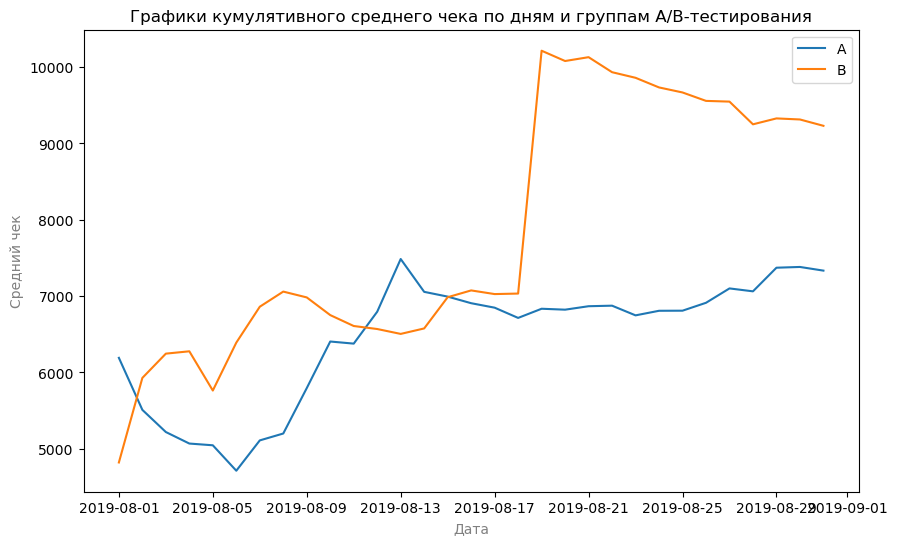

In [55]:
# Задаем размеры графика
plt.figure(figsize=(10,6))

# Разделим кумулятивную выручку на кумулятивное число заказов
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# Выводим название графика, осей и легенду
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования')
plt.xlabel('Дата', color='gray')
plt.ylabel('Средний чек', color='gray')
plt.legend()
plt.show()

Средний чек становится более равномерным ближе к концу теста: наблюдается рост для группы A и продолжает падать для группы B. Возможно, в группу B определенный период теста попали особо крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Строим график относительного изменения кумулятивного среднего чека группы В к группе А

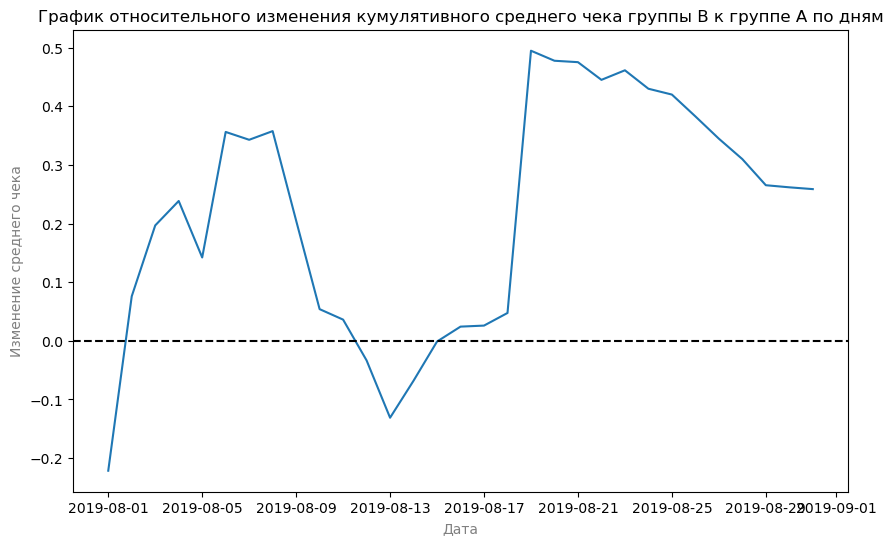

In [56]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# Задаем размеры графика
plt.figure(figsize=(10,6))

# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
)/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А по дням')
plt.xlabel('Дата', color='gray')
plt.ylabel('Изменение среднего чека', color='gray')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы.

### Строим график кумулятивного среднего количества заказов на посетителя по группам

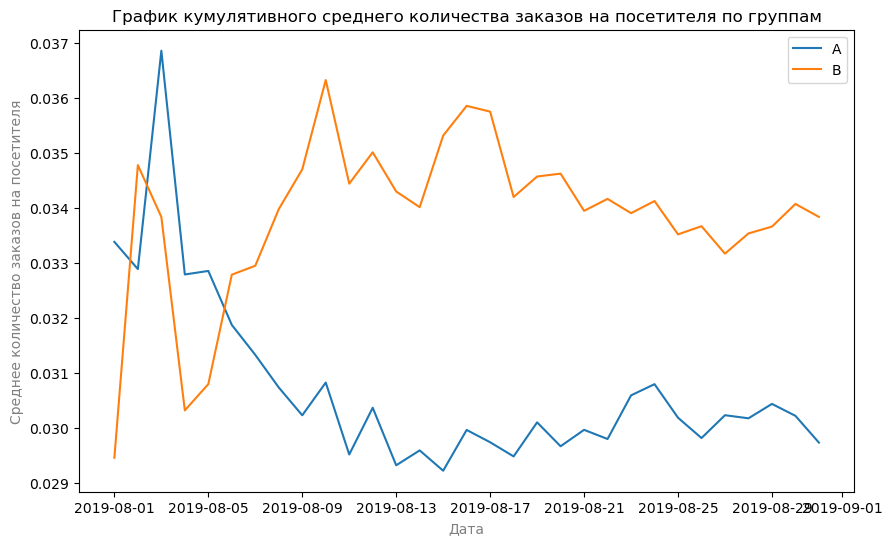

In [57]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['csaov'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Задаем размеры графика
plt.figure(figsize=(10,6))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['csaov'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['csaov'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата', color='gray')
plt.ylabel('Среднее количество заказов на посетителя', color='gray')
plt.legend()
plt.show()

Наблюдаем сильные всплески вначале эксперимента. Далее графики еще не выровнялись, колебания присутствуют, но уже без значительных (как вначале) перепадов. 

Сначала среднее количество заказов на посетителя группы А было значительно выше, но группа B вырвалась вперёд, а график группы A просел.

### Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А

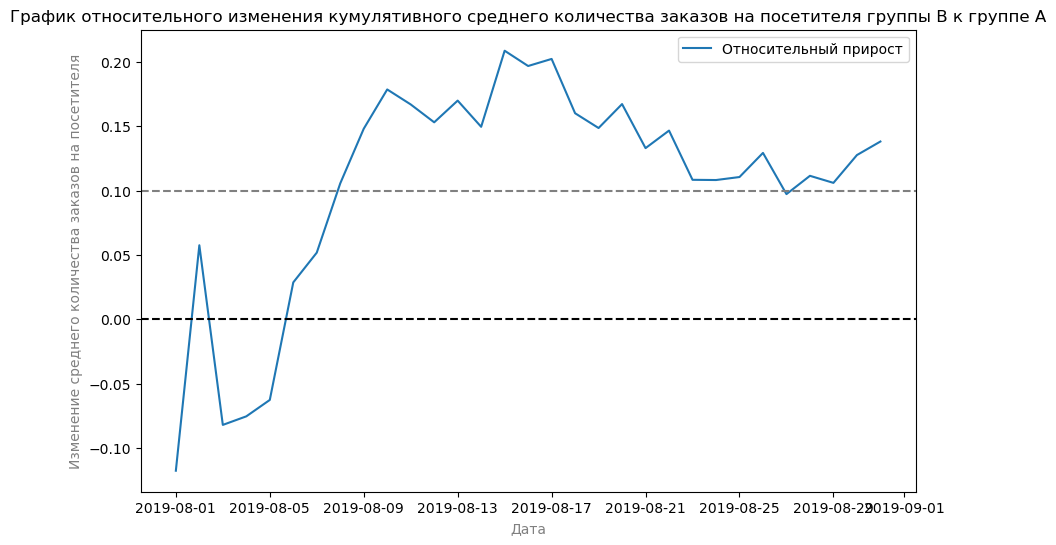

In [58]:
# Построим график относительного различия кумулятивного среднего количества заказов на посетителя
mergedCumulative_csaov = cumulativeDataA[['date','csaov']].merge(
    cumulativeDataB[['date','csaov']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# Задаем размеры графика
plt.figure(figsize=(10,6))

plt.plot(
    mergedCumulative_csaov['date'], mergedCumulative_csaov['csaovB']/
    mergedCumulative_csaov['csaovA']-1, label="Относительный прирост"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('Дата', color='gray')
plt.ylabel('Изменение среднего количества заказов на посетителя', color='gray')
plt.legend()
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, в конце графика есть небольшой рост.

### Подсчитаем количество заказов по пользователям и построим точечный график на их основе

In [59]:
# Cчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

# Даем столбцам понятные названия
ordersByUsers.columns = ['visitorId', 'orders']

# Выводим первые 10 строк таблицы на экран
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


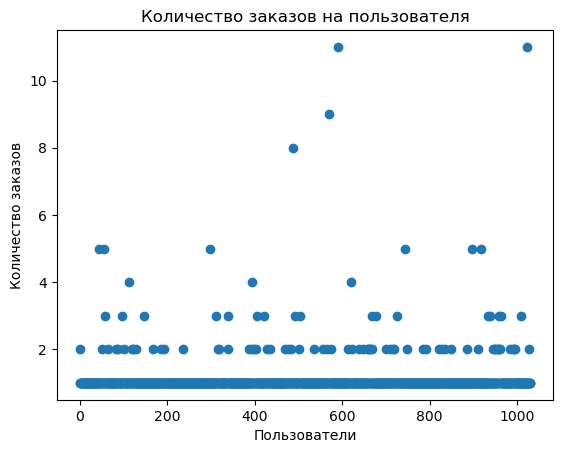

In [60]:
# Строим точечный график количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Количество заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Абсолютное большинство пользователей совершило по 1 заказу, так же значительное количество совершили 2 заказа, реже - 3. Однако наблюдаем что есть пользователи, совершившие 8, 9 и 11 заказов.

### Посчитаем выборочные перцентили количества заказов на одного пользователя

In [61]:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказ. И 1% пользователей заказывали более 4 раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

###  Строим точечный график распределения стоимостей заказов

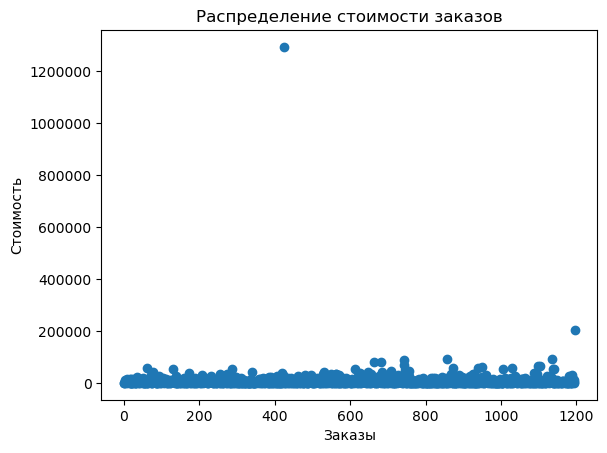

In [62]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

Видим что есть очень дорогие заказы - в районе 200 000, и даже более 1 200 000 у.е.

In [63]:
# Находим стоимость самых дорогих заказов
orders['revenue'].sort_values(ascending=False).head(2)

425     1294500
1196     202740
Name: revenue, dtype: int64

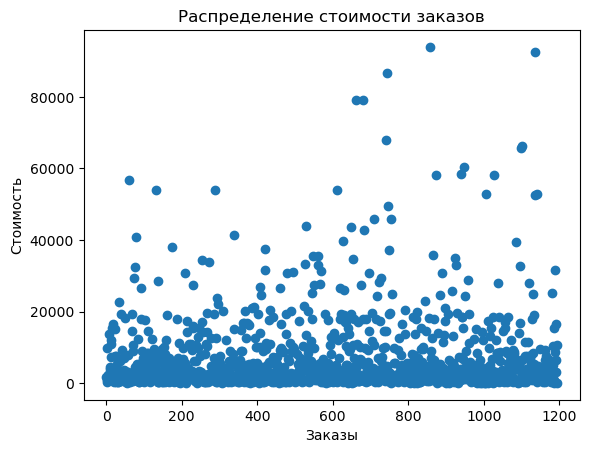

In [64]:
# Строим график распределения стоимости заказов без учета самых дорогих
orders_norm = orders['revenue'][orders['revenue'] < 202740]
x_values = pd.Series(range(0,len(orders_norm)))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders_norm)
plt.title('Распределение стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()                

По графику можно увидеть, что больше всего заказов стоимостью до 20 тыс. у.е.

### Посчитаем выборочные перцентили стоимости заказов

In [65]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Не более 1% заказов стоят более 58,2 тыс. у.е., не более 5% заказов дороже 28 тыс. у.е. Оставим верхний предел для стоимости заказа 28 тыс. у.е.

# Анализ A/B-теста

Так как в наших данных есть большие выбросы, проверку будем осуществлять с помощью непараметрического теста Уилкоксона-Манна-Уитни.

Посчитаем статистическую значимость различия в среднем количестве заказов на посетителя между группами по "сырым данным". 
Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 

Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

In [66]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [67]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой
display("p-value:","{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Выведем относительный прирост среднего числа заказов группы B
display("Относительное различие в среднем количестве заказов на посетителя:","{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'p-value:'

'0.017'

'Относительное различие в среднем количестве заказов на посетителя:'

'0.138'

Вывод: По «сырым» данным различия в среднем числе заказов на посетителя групп A и B есть. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13,8% — второе число в выводе.

### Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [68]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, 
# передадим критерию mannwhitneyu() данные о выручке с заказов
display('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Найдём относительные различия в среднем чеке между группами
display('Отностельное различие в среднем чеке между группами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-value:'

'0.729'

'Отностельное различие в среднем чеке между группами:'

'0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Очищаем данные
Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём  5% пользователей с наибольшим числом заказов и пользователей с дорогими заказами.

In [69]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'],95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersB['orders'],95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])
display(round(abnormalUsers.shape[0] / len(orders['visitorId'].unique()) * 100, 0))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

74

7.0

Всего аномальных пользователей 74 - и это около 7% наших данных. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [70]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [71]:
display('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('Относительное различие в среднем количестве заказов на посетителя:','{0:.3f}'
        .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-value:'

'0.013'

'Относительное различие в среднем количестве заказов на посетителя:'

'0.173'

Результаты по количеству заказов на посетителя по сравнению с "сырыми данными" практически не изменились. Т.е., нулевую гипотезу отвергаем - статистически значимые различия в количестве заказов на посетителя между группами есть. Относительный выигрыш группы B немного увеличился - с 13,8% до 17,3%.

In [72]:
display('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display('Отностельное различие в среднем чеке между группами:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'p-value:'

'0.738'

'Отностельное различие в среднем чеке между группами:'

'-0.020'

P-value увеличился, подтверждаем по очищенным данным, что статистически значимых различий в среднем чеке между сегментами нет. Однако разница между сегментами изменилась из-за удаления аномально дорогих заказов, теперь средний чек группы В немного меньше, чем в группе А, на 2%.

## Выводы из A/B-теста

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
- Как по сырым, так и по очищенным данным нет статистически значимого различия по среднему чеку между группами. Однако, средний чек группе В, значительно превосходивший группу А, после удаления аномалий в  почти с ним сравнялася (стал на 2% ниже).
- График различия среднего количества заказов на посетителя между группами сообщает, что в целом результаты группы B лучше группы A. Однако, на графике есть пик ("скачок") затем тенденция к снижению, а в конце графика есть небольшой рост.
- График различия среднего чека в нескольких точках резко «скачет». Однако ближе к концу график имеет тенденцию к меньшим колебаниям, но стабилизации не наблюдается.

Исходя из того, график различия по среднему количеству заказов на посетителя за этот период близок к стабилизации, есть понимание, что результаты группы В превосходят группу А. Так же тест продолжается достаточно долгий период - 1 месяц, и, несмотря на то, что график различия среднего чека так и не стабилизировался, все равно можно принять решение закончить тестирование и признать победителем группу В.